# Laboratorio Clustering

## Clusterin Sin Signal

In [64]:
#Zona de importaciones
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### K-Means

In [65]:
#Importando los datos
sindata = pd.read_excel('Sin2.xlsx')
sindata.head()

,58882,63168
0,58959,63322
1,59034,60585
2,59145,61717
3,59164,59757
4,59168,61401


In [66]:
#Normalizamos los datos
sindata = StandardScaler().fit_transform(sindata)

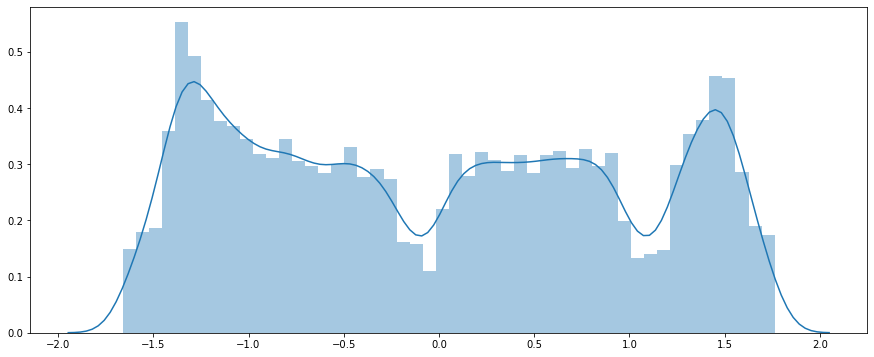

In [67]:
#Realizamos un pequeño análisis exploratorio
plt.figure(1,figsize=(15,6))
n=0
sns.distplot(sindata)
plt.show()

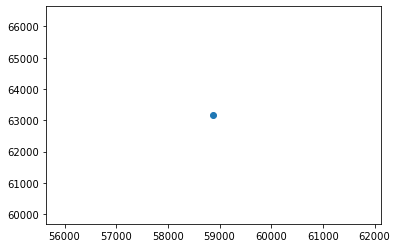

In [68]:
#Visualizando el Dataset
plt.scatter(x=58882,y=63168,data=sindata)
plt.show()

In [69]:
#Realizamos el ajusste para K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(sindata)

In [70]:
#Revisamos los grupos formados
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

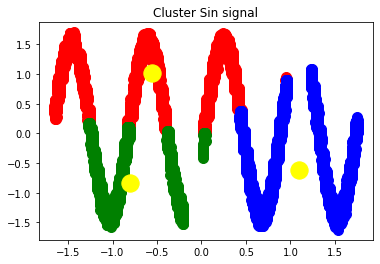

In [72]:
#Visualizamos los clusters
plt.scatter(sindata[y_kmeans == 0, 0], sindata[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata[y_kmeans == 1, 0], sindata[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata[y_kmeans == 2, 0], sindata[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Sin signal')
plt.show()

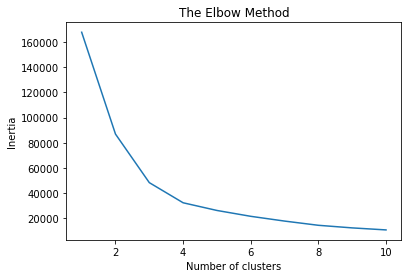

In [73]:
#Lo anterior fue con un K dado arbitrariamente. Busquemos el K más óptimo con Elbow Method
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(sindata)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [74]:
#Podemos observar que el K que mejor se ajusta es K=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(sindata)

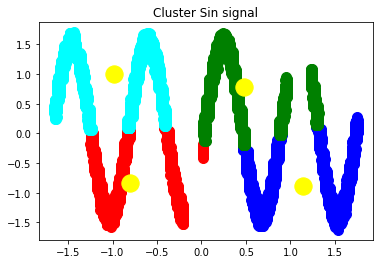

In [75]:
#Volvemos a gráficar, pero ahora con K = 4
#Visualizamos los clusters
plt.scatter(sindata[y_kmeans == 0, 0], sindata[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(sindata[y_kmeans == 1, 0], sindata[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(sindata[y_kmeans == 2, 0], sindata[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(sindata[y_kmeans == 3, 0], sindata[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(sindata[y_kmeans == 4, 0], sindata[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster Sin signal')
plt.show()